<ipython-input-2-4331b82d239c>:3: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import IBMQ, BasicAer
configrc.store_credentials:WARNING:2024-10-28 23:33:45,646: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2024-10-28 23:33:45,909: Credentials are already in use. The existing account in the session will be replaced.
<ipython-input-2-4331b82d239c>:48: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitive

Количество итераций с наибольшей амплитудой: 8


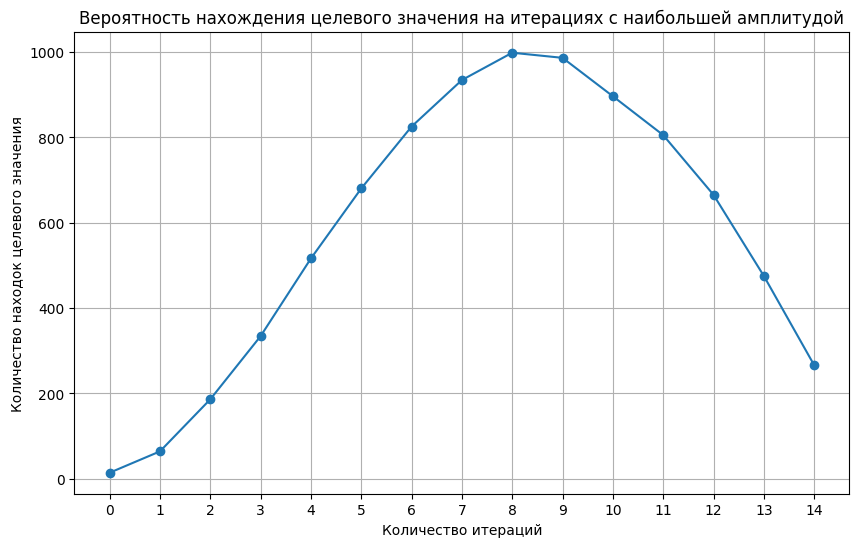

In [2]:
!pip install qiskit==0.46 qiskit-ibmq-provider pylatexenc qiskit-aer

from qiskit import IBMQ, BasicAer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.pyplot as plt
MY_API_TOKEN = 'e44c3a32b394a3606eebb9a41b309d2a2a512dec55418805e58e600ac2638899fbc935c93739744b45a02a09d2e7dc6c3d6f3bc7764aaf61b1ae6d81faceebf6'
IBMQ.save_account(MY_API_TOKEN)

IBMQ.load_account()
n = 7
backend = Aer.get_backend('qasm_simulator')
prob_of_ans = []
target_value = '0111111'
for x in range(15):
    database = QuantumRegister(n)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(n-1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)

    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])

    for j in range(x):
        for k in range(n):
            if target_value[k] == '0':
                qc.x(database[k])
        qc.mct(database[:], oracle[0], auxiliary[:])
        for k in range(n):
            if target_value[k] == '0':
                qc.x(database[k])

        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[n-1])
        qc.mct(database[:-1], database[n-1], auxiliary[:])
        qc.h(database[n-1])
        qc.x(database[:])
        qc.h(database[:])

    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database, cr)
    qc = qc.reverse_bits()

    job = execute(qc, backend=backend, shots=1000)
    result = job.result()
    count = result.get_counts()

    answer = count.get(target_value, 0)
    prob_of_ans.append(answer)
    max_amplitude_iterations = np.argmax(prob_of_ans)
print(f'Количество итераций с наибольшей амплитудой: {max_amplitude_iterations}')

plt.figure(figsize=(10, 6))
plt.plot(range(15), prob_of_ans, marker='o')
plt.title('Вероятность нахождения целевого значения на итерациях с наибольшей амплитудой')
plt.xlabel('Количество итераций')
plt.ylabel('Количество находок целевого значения')
plt.xticks(range(15))
plt.grid()
plt.show()